A: Histogram, Histogram Post Manual, Histogram Post Otsu


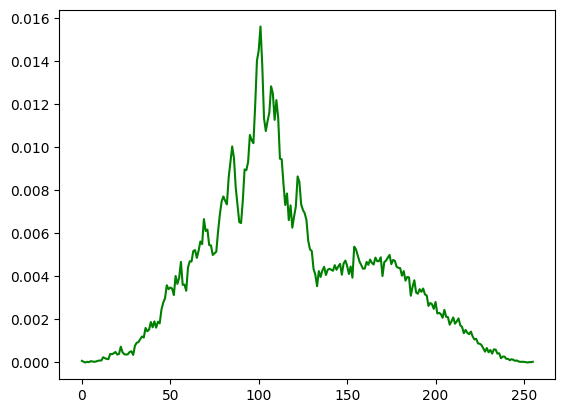

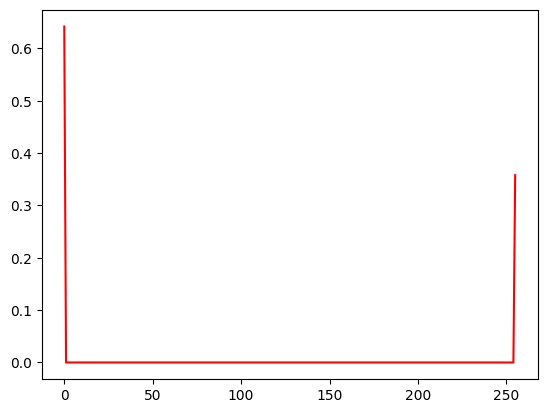

B: Histogram, Histogram Post Manual, Histogram Post Otsu


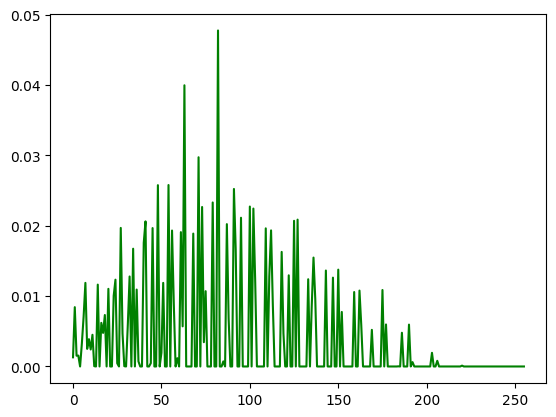

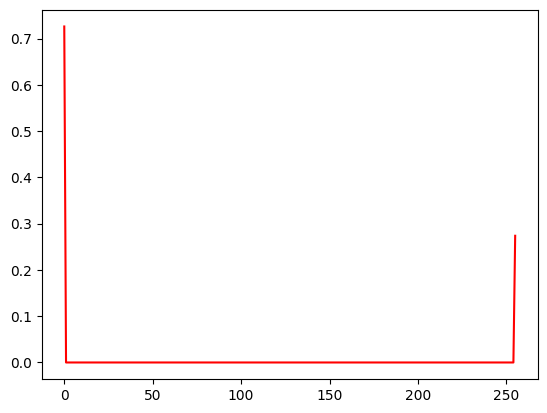

C: Histogram, Histogram Post Manual


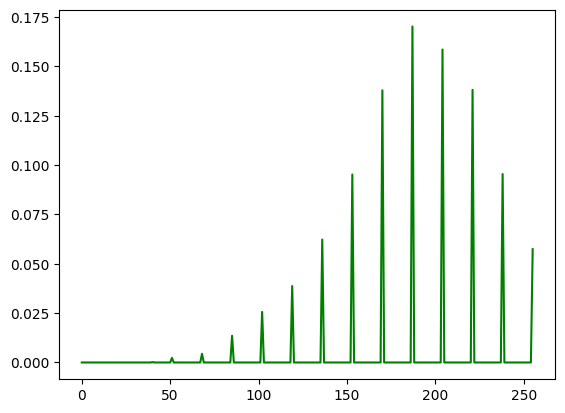

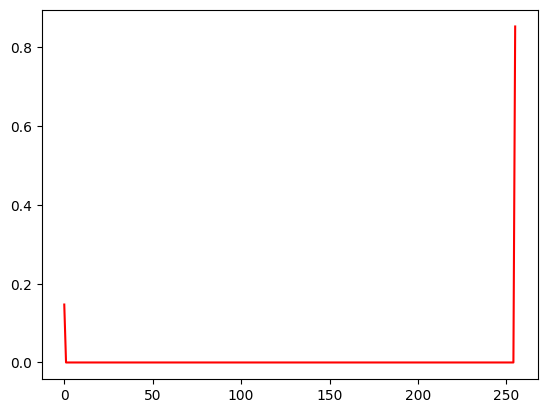

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

oa_img = cv2.imread('./b2_a.png', cv2.IMREAD_GRAYSCALE)
ob_img = cv2.imread('./b2_b.png', cv2.IMREAD_GRAYSCALE)
oc_img = cv2.imread('./b2_c.png', cv2.IMREAD_GRAYSCALE)
na_img = np.array(oa_img)
a_img = ((na_img - np.min(na_img)) * (1/(np.max(na_img) - np.min(na_img)) * 255)).astype('uint8')
nb_img = np.array(ob_img)
b_img = ((nb_img - np.min(nb_img)) * (1/(np.max(nb_img) - np.min(nb_img)) * 255)).astype('uint8')
nc_img = np.array(oc_img)
c_img = ((nc_img - np.min(nc_img)) * (1/(np.max(nc_img) - np.min(nc_img)) * 255)).astype('uint8')

# extra helper functions:
# df function
def create_hist(img_in):
    # Initialize a list with 256 zeros to represent the pdf bins
    pdf = [0] * 256
    total_pixels = 0
    
    # Iterate through each pixel in the image
    for row in img_in:
        for pixel in row:
            # Update the corresponding bin in the pdf
            pdf[pixel] += 1
            total_pixels += 1

    pdf = [count / total_pixels for count in pdf]

    return pdf

# thresholding functions:
# defining manual threshold function here
def manual_threshold(img_in, threshold):
    
    manual_thresh_img = []
    
    for row in img_in:
        thresholded_row = []
        for pixel in row:
            thresholded_row.append(255 if pixel > threshold else 0)
        manual_thresh_img.append(thresholded_row)

    return manual_thresh_img


global_threshold = 127
# processing A image with both manual & otsu thresholding
pma_img = manual_threshold(a_img, global_threshold)
a_arr = np.array(pma_img)
cv2.imwrite('b2_a_processed_manual.png', a_arr)


# processing B image with both manual & otsu
pmb_img = manual_threshold(b_img, global_threshold)
b_arr = np.array(pmb_img)
cv2.imwrite('b2_b_processed_manual.png', b_arr)

# processing C image with both manual & otsu
pmc_img = manual_threshold(c_img, global_threshold)
c_arr = np.array(pmc_img)
cv2.imwrite('b2_c_processed_manual.png', c_arr)


# Graph Visualizations
print("A: Histogram, Histogram Post Manual, Histogram Post Otsu")
am_img = cv2.imread('./b2_a_processed_manual.png', cv2.IMREAD_GRAYSCALE)
aog_img = cv2.imread('./b2_a.png', cv2.IMREAD_GRAYSCALE)

hist_am = create_hist(am_img)
hist_a = create_hist(aog_img)

plt.plot(hist_a, color="green")
plt.show()
plt.plot(hist_am, color="red")
plt.show()


print("B: Histogram, Histogram Post Manual, Histogram Post Otsu")
bm_img = cv2.imread('./b2_b_processed_manual.png', cv2.IMREAD_GRAYSCALE)
bog_img = cv2.imread('./b2_b.png', cv2.IMREAD_GRAYSCALE)

hist_bm = create_hist(bm_img)
hist_b = create_hist(bog_img)

plt.plot(hist_b, color="green")
plt.show()
plt.plot(hist_bm, color="red")
plt.show()


print("C: Histogram, Histogram Post Manual")
cm_img = cv2.imread('./b2_c_processed_manual.png', cv2.IMREAD_GRAYSCALE)
cog_img = cv2.imread('./b2_c.png', cv2.IMREAD_GRAYSCALE)

hist_cm = create_hist(cm_img)
hist_c = create_hist(cog_img)

plt.plot(hist_c, color="green")
plt.show()
plt.plot(hist_cm, color="red")
plt.show()



Otsu Threshold:  126
Max-Variance:  3890.0925490599625


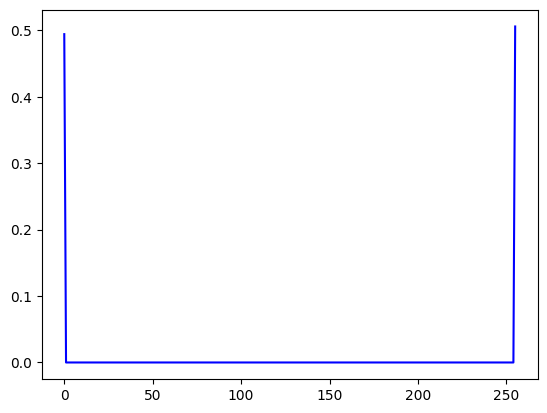

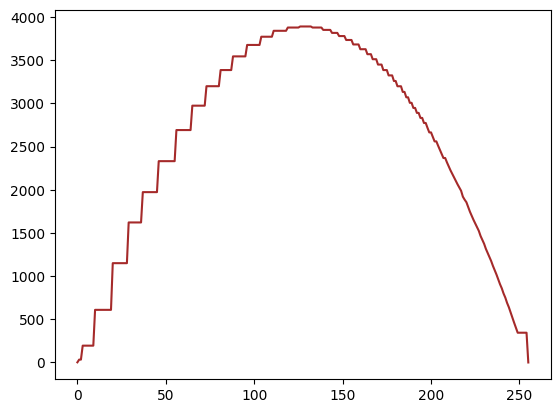

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

a_img = cv2.imread('./b2_a.png', cv2.IMREAD_GRAYSCALE)
b_img = cv2.imread('./b2_b.png', cv2.IMREAD_GRAYSCALE)
c_img = cv2.imread('./b2_c.png', cv2.IMREAD_GRAYSCALE)
d_img = cv2.imread('./people_processed_x2.png', cv2.IMREAD_GRAYSCALE)

un_img = np.array(d_img)
u_img = ((un_img - np.min(un_img)) * (1/(np.max(un_img) - np.min(un_img)) * 255)).astype('uint8')

# extra helper functions:
# df function
def create_hist(img_in):
    # Initialize a list with 256 zeros to represent the pdf bins
    pdf = [0] * 256
    total_pixels = 0
    
    # Iterate through each pixel in the image
    for row in img_in:
        for pixel in row:
            # Update the corresponding bin in the pdf
            pdf[pixel] += 1
            total_pixels += 1

    pdf = [count / total_pixels for count in pdf]

    return pdf

def otsu_threshold(img_in):
    # Create histogram
    hist = create_hist(img_in)
    total_pixels = sum(hist)
    sum_total = sum(t * hist[t] for t in range(256))
    sum_back = 0
    w_b = 0
    w_f = total_pixels
    var_max = 0
    threshold = 0
    var_plot = [0] * 256

    # Iterate through all possible thresholds
    for t in range(256):
        w_b += hist[t]
        if w_b == 0:
            continue
        w_f = total_pixels - w_b
        if w_f == 0:
            break
        
        sum_back += t * hist[t]
        mean_f = (sum_total - sum_back) / w_f
        variance = w_b * w_f * (((sum_back / w_b) - mean_f)**2)
        var_plot[t] = variance

        # Check if new maximum found
        if variance > var_max:
            var_max = variance
            threshold = t

    # Apply thresholding to img
    otsu_threshold_img = []
    for row in img_in:
        thresholded_row = []
        for pixel in row:
            thresholded_row.append(255 if pixel > threshold else 0)
        otsu_threshold_img.append(thresholded_row)

    # Return the result and the optimal threshold
    return otsu_threshold_img, threshold, var_max, var_plot



result_img, result_t, result_vmax, result_plot = otsu_threshold(u_img)
arr = np.array(result_img)
print("Otsu Threshold: ", result_t)
print("Max-Variance: ", result_vmax)
cv2.imwrite('otsu_result.png', arr)

post_res_img = cv2.imread('./otsu_result.png', cv2.IMREAD_GRAYSCALE)
post_hist = create_hist(post_res_img)

plt.plot(post_hist, color="blue")
plt.show()

plt.plot(result_plot, color="brown")
plt.show()





